<a href="https://colab.research.google.com/github/axz91/RGC/blob/main/MRS_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nmrglue

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 3.9 MB/s eta 0:00:00


In [2]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# read in the data from a NMRPipe file
data = ng.fileio.bruker.read(
    dir='/content/drive/MyDrive/70_ENC2020/1/', bin_file="fid",shape=(512,36),
    pprog_file="pulseprogram")


data


/usr/local/lib/python3.10/dist-packages/nmrglue/fileio/bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


({'procs': {'_coreheader': ['##TITLE=Parameter List, ParaVision 6.0.1',
    '##JCAMPDX=4.24',
    '##DATATYPE=Parameter Values',
    '##ORIGIN=Bruker BioSpin MRI GmbH',
    '##OWNER=nmrsu'],
   '_comments': ['$$ 2019-12-07 16:32:01.949 -0500  nmrsu@CZC642BNVQ',
    '$$ /opt/PV6.0.1/data/nmrsu/20191201_181536_V9_4T_GapR_1_1/70/pdata/1/procs',
    '$$ process /opt/PV6.0.1/prog/bin/parxserver'],
   'OFFSET': 4.99568064058648,
   'SF': 400.345847521031,
   'YMAX_p': 32766,
   'YMIN_p': 1},
  'FILE_SIZE': 73728},
 array([[  -484,  -1037,    648, ...,   -931,    935,  -2360],
        [  1165,   2791,   1291, ...,    644,    -42,  -2633],
        [ -1907,    447,   3124, ...,  -5795, -12643, -11051],
        ...,
        [   -47,  -1198,    343, ...,    814,    692,  -2689],
        [  -236,     79,  -2072, ...,    154,    232,    635],
        [    68,   1508,    329, ...,   1054,    825,      7]], dtype=int32))

In [3]:
data = data[1]


In [4]:
data.shape

(512, 36)

In [5]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# READ THE 2048 X 2048 MATRIX
##############################
data_dim1 = data
#############################

# FFT the 2048 x 2048 matrix VIA THE AXIS 1
fft_data_dim1_axis_0 = np.fft.fft(data_dim1 ,axis=0)


# SHIFT OVER AXIS 1
fft_data_dim1_shift_0 = np.fft.fftshift(fft_data_dim1_axis_0,axes=(0)
)


# GET THE REAL NUMBER PART OF FIRST MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_real = np.real(fft_data_dim1_shift_0)
# GET THE IMAG PART OF THE FIRST MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_imag = np.imag(fft_data_dim1_shift_0)
# GET THE ABS VALUE OF FIRST MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim1_abs = abs(fft_data_dim1_shift_0)





# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0,axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1)
)



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_columns_with_offsets_no_norm(data, start_column, end_column, x_offset, y_offset):

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(40, 40))

    # Plot each column as a separate line with horizontal and vertical offsets
    for i in range(start_column-1, end_column):  # Subtract 1 here to convert from 1-indexing to 0-indexing
        ax.plot(np.arange(data.shape[0]) + i*x_offset, data[:, i] + i*y_offset, label=f'Spectrum {i+1}')  # Add 1 here to convert back for the label

    # Add labels
    ax.set_xlabel('Rows (with offset)')
    ax.set_ylabel('Normalized Values (with offset)')

    # Show the legend
    ax.legend(loc='upper left')
    ax.set_title(f'Spectrum {start_column} to {end_column}', size=28)

    # Save the figure
    fig.savefig("1.pdf", format='pdf', bbox_inches='tight')

    # Show the plot
    #plt.show()

    #return fig


In [10]:
fft_data_dim1_shift_0

array([[-25491.            +0.j        ,  61443.            +0.j        ,
        -49156.            +0.j        , ...,
        -12360.            +0.j        ,  43448.            +0.j        ,
         10866.            +0.j        ],
       [ 14588.20706752-77107.46581766j, -23957.20322116+36174.88572513j,
        -36256.87940781+47609.90853568j, ...,
        -33605.62647766-49433.62717524j, -27642.47996709-37334.25944671j,
          7952.82429458 -3798.23995329j],
       [ 19165.40479016+98001.35262183j,  26931.45363827+12937.35928157j,
        -23829.13849935 +8323.52492105j, ...,
         27429.85201994+66033.26532305j,  49898.65273852+51209.67802832j,
        -12000.25374684-34954.77889632j],
       ...,
       [-12781.54422981 +3603.02580906j, -32520.37065495-21053.95467564j,
        -49914.24830979-40821.81638809j, ...,
        -10947.12805289 -6849.58321427j, -51007.67027333-14517.83479498j,
        -19289.74678515 +5364.36885907j],
       [ 19165.40479016-98001.35262183j,  26

In [ ]:
import numpy as np

# Assuming fft_data_dim1_shift_0 is your complex data

# Create an array for x values
x = np.arange(512)

# Initialize arrays to store fitted values
fitted_values_real = np.zeros_like(fft_data_dim1_real)
fitted_values_imag = np.zeros_like(fft_data_dim1_imag)

# Loop over each column
for i in range(fft_data_dim1_shift_0.shape[1]):
    # Separate real and imaginary parts
    y_real = fft_data_dim1_real[:, i]
    y_imag = fft_data_dim1_imag[:, i]

    # Fit a degree 2 polynomial (change 2 to whatever degree you want)
    coeff_real = np.polyfit(x, y_real, 32)
    coeff_imag = np.polyfit(x, y_imag, 32)

    # Evaluate the polynomial at each x
    fitted_values_real[:, i] = np.polyval(coeff_real, x)
    fitted_values_imag[:, i] = np.polyval(coeff_imag, x)

# Combine real and imaginary parts to get fitted values
fitted_values = fitted_values_real + 1j * fitted_values_imag

In [8]:
fitted_values

array([[ -8001.23091292-22407.19015601j,  -1402.11790305+17735.42308491j,
        -78712.57868806+31365.3628919j , ...,
        -16089.05645104 +2281.32336302j,  -2535.13710912-11009.57307371j,
        -10918.04911397  +927.25328702j],
       [   606.74090856-12450.99676794j,  10640.82481364 +8588.03301483j,
        -50216.5461998 +16307.51353416j, ...,
         -8062.09866817 -7469.23437517j,   7523.34704536 -8804.61961898j,
         -4759.61826068  -583.89763162j],
       [  6001.98680211 -4623.04559681j,  17022.98637463 +3784.34480425j,
        -28899.86030762 +6150.95406497j, ...,
         -3258.29583791-14033.00686963j,  12403.85753747 -6101.48566543j,
          -630.40672229 -1055.08431162j],
       ...,
       [ 16464.08219883 +5577.45194251j,  -8540.0352456 +14838.01247104j,
        -31938.26383069+10405.38080214j, ...,
         11178.61985055+26968.32896988j,  -6391.77316202+21280.97233766j,
        -24086.65696495 +3089.16238838j],
       [  7652.16230239+12108.94234707j, -17

In [11]:
fitted_values.shape

(512, 36)

In [12]:
fft_data_dim1_shift_0 = fitted_values

# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0,axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1)
)



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)

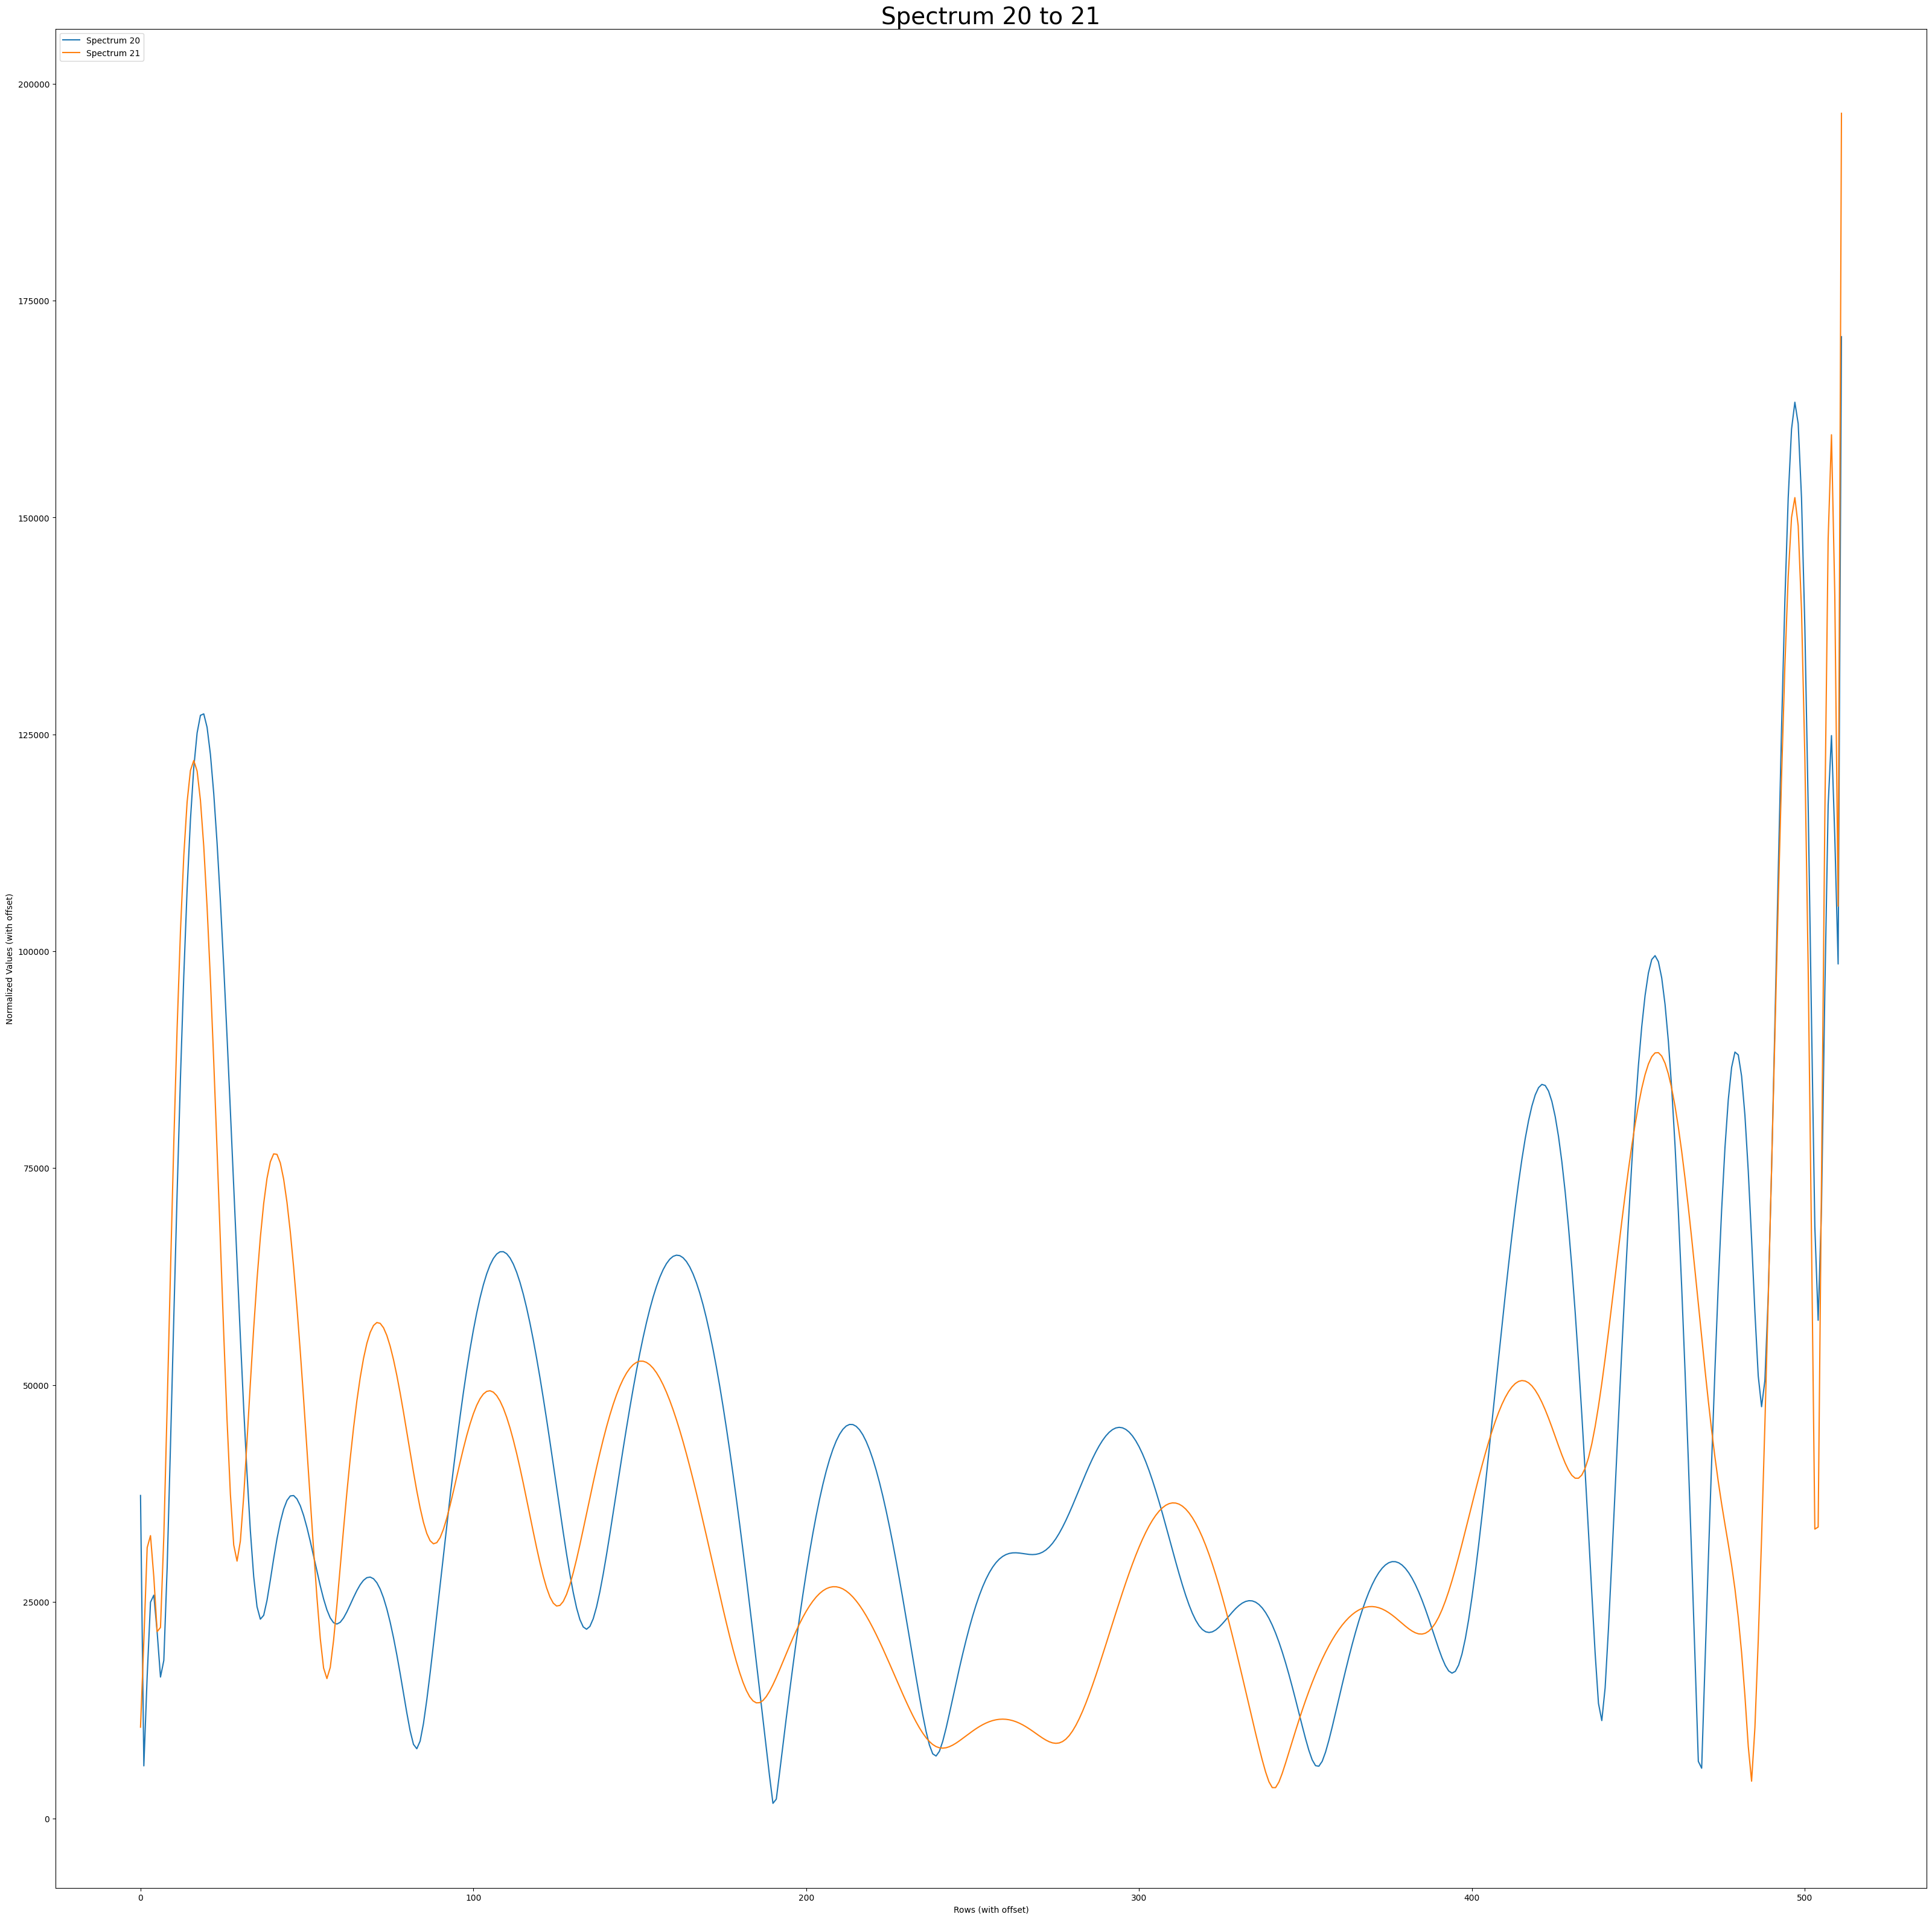

In [ ]:
plot_columns_with_offsets_no_norm(fft_data_dim2_abs,20,21,0,0)

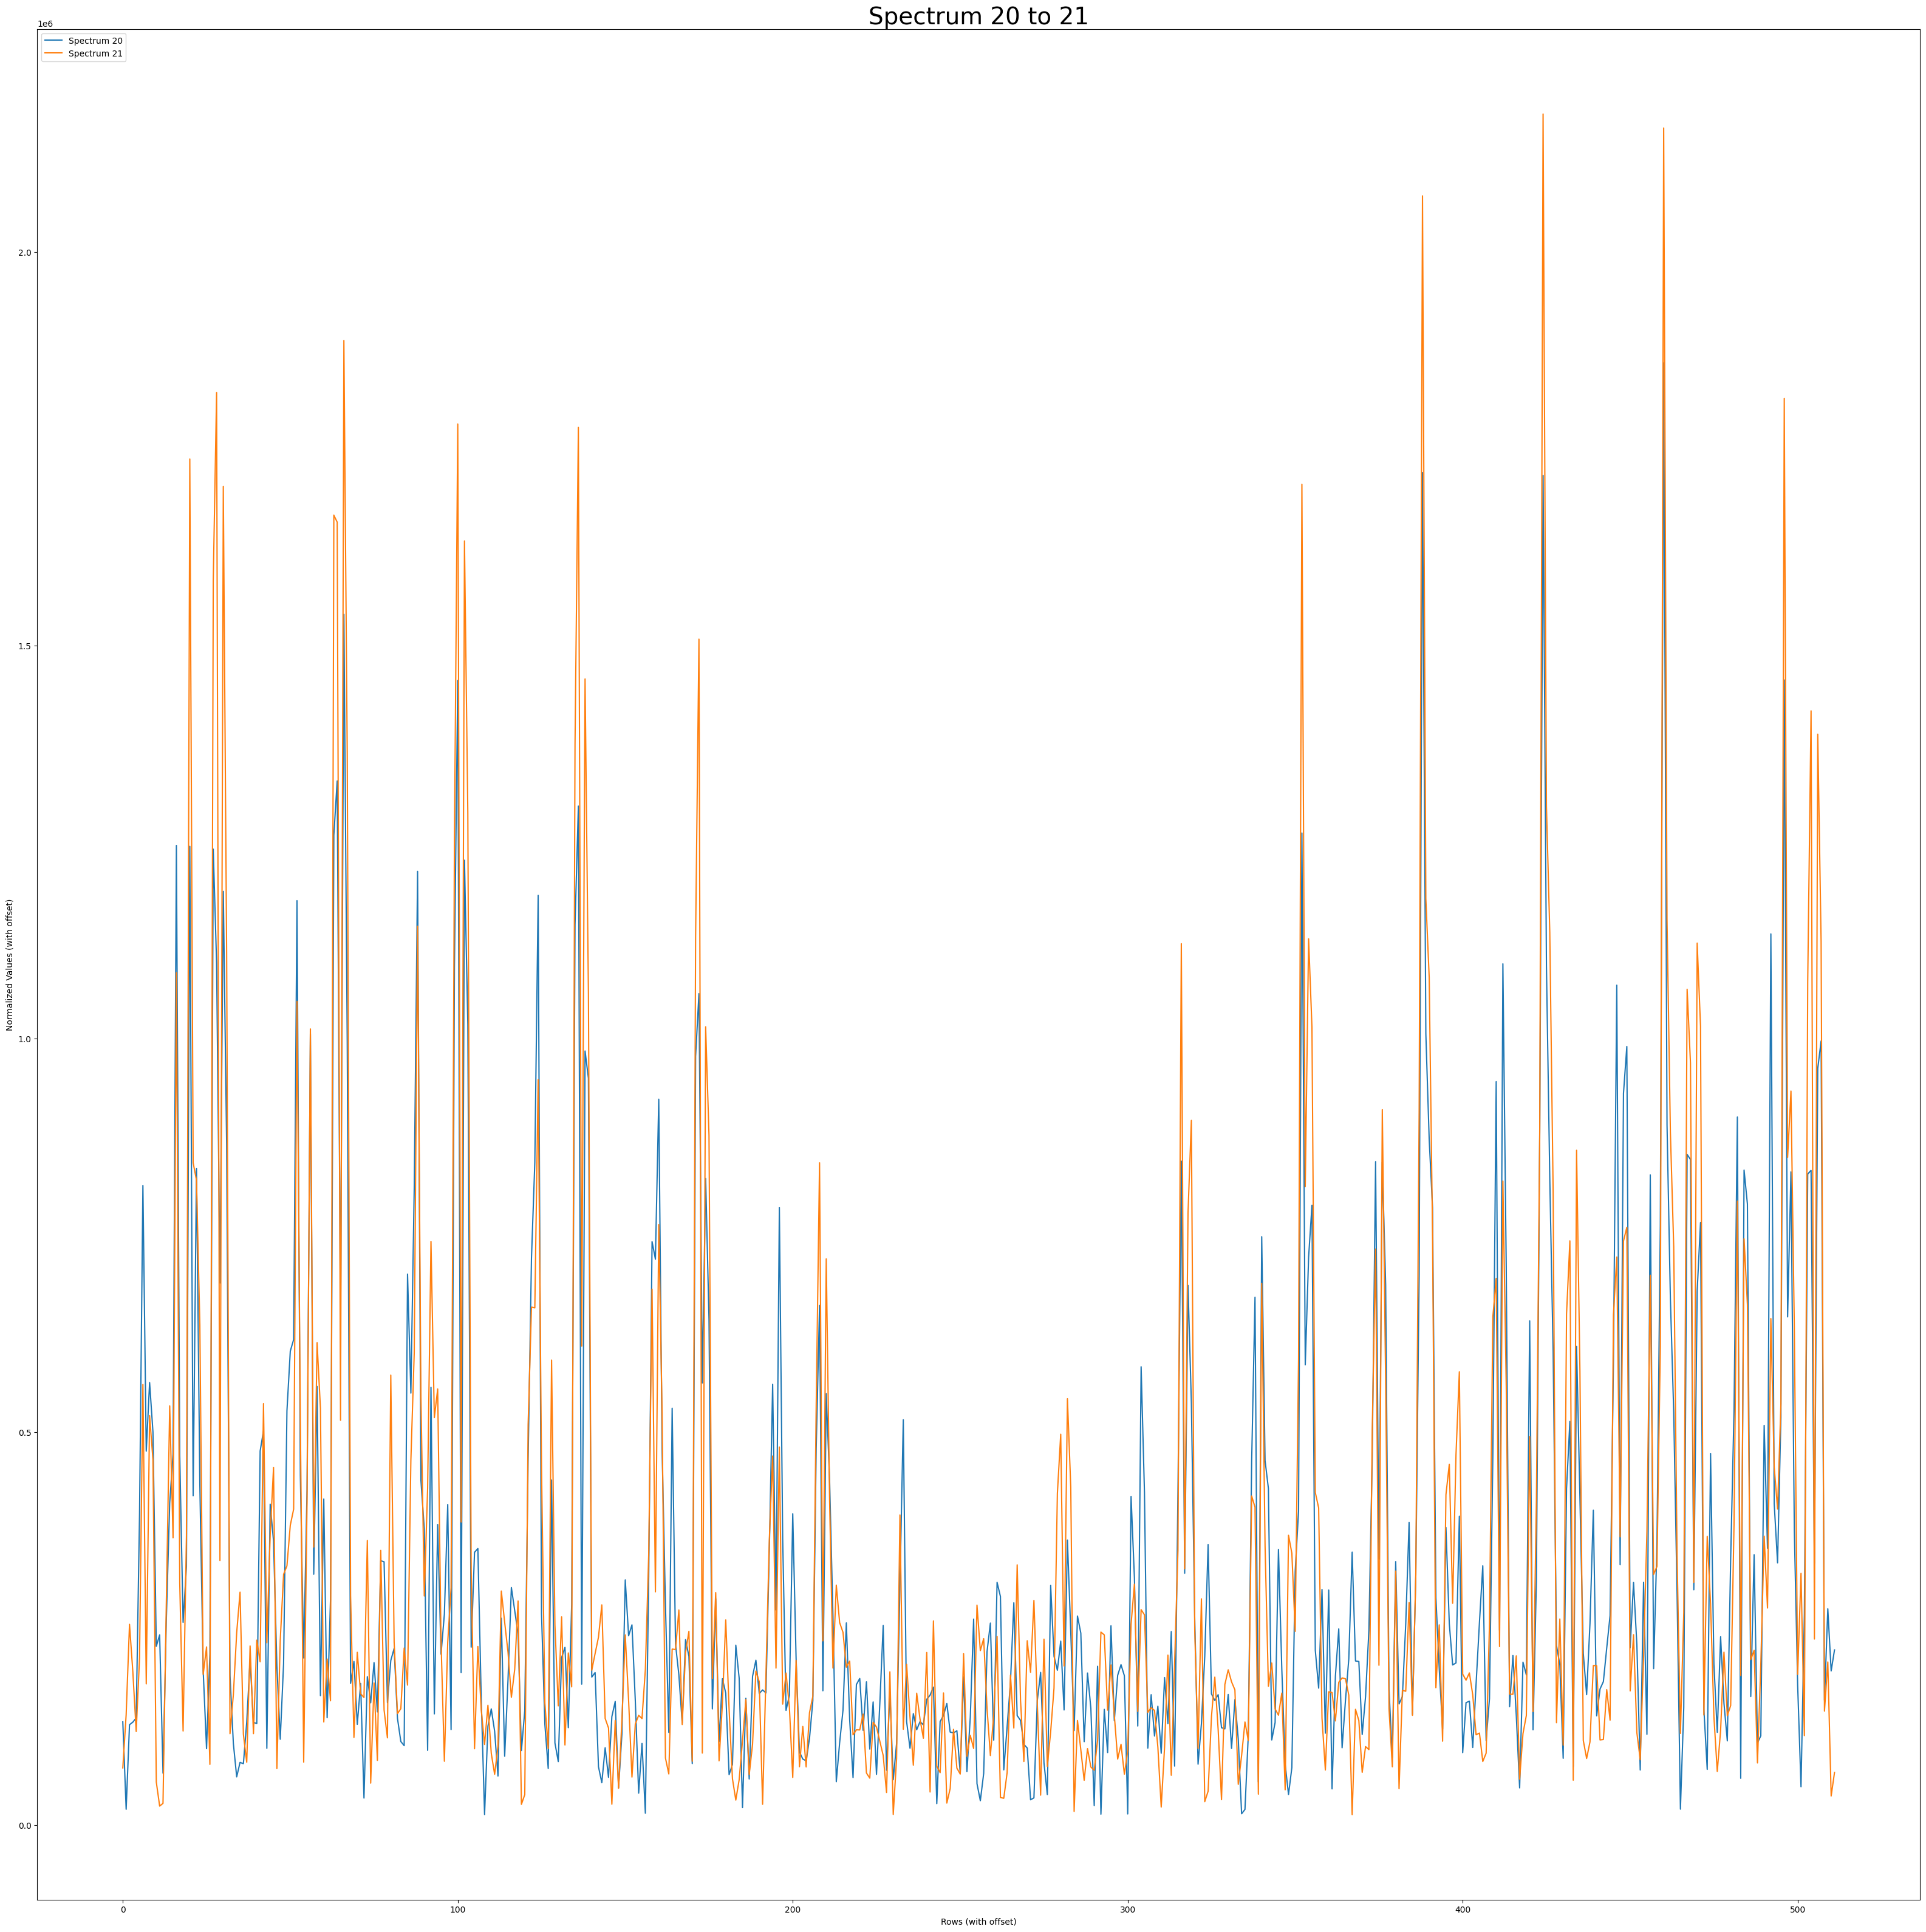

In [ ]:
## REAL, output real part sepctrum 1 to 20, with 0 offset
plot_columns_with_offsets_no_norm(fft_data_dim2_abs,20,21,0,0)

In [ ]:
fft_data_dim2_abs[:, 0]

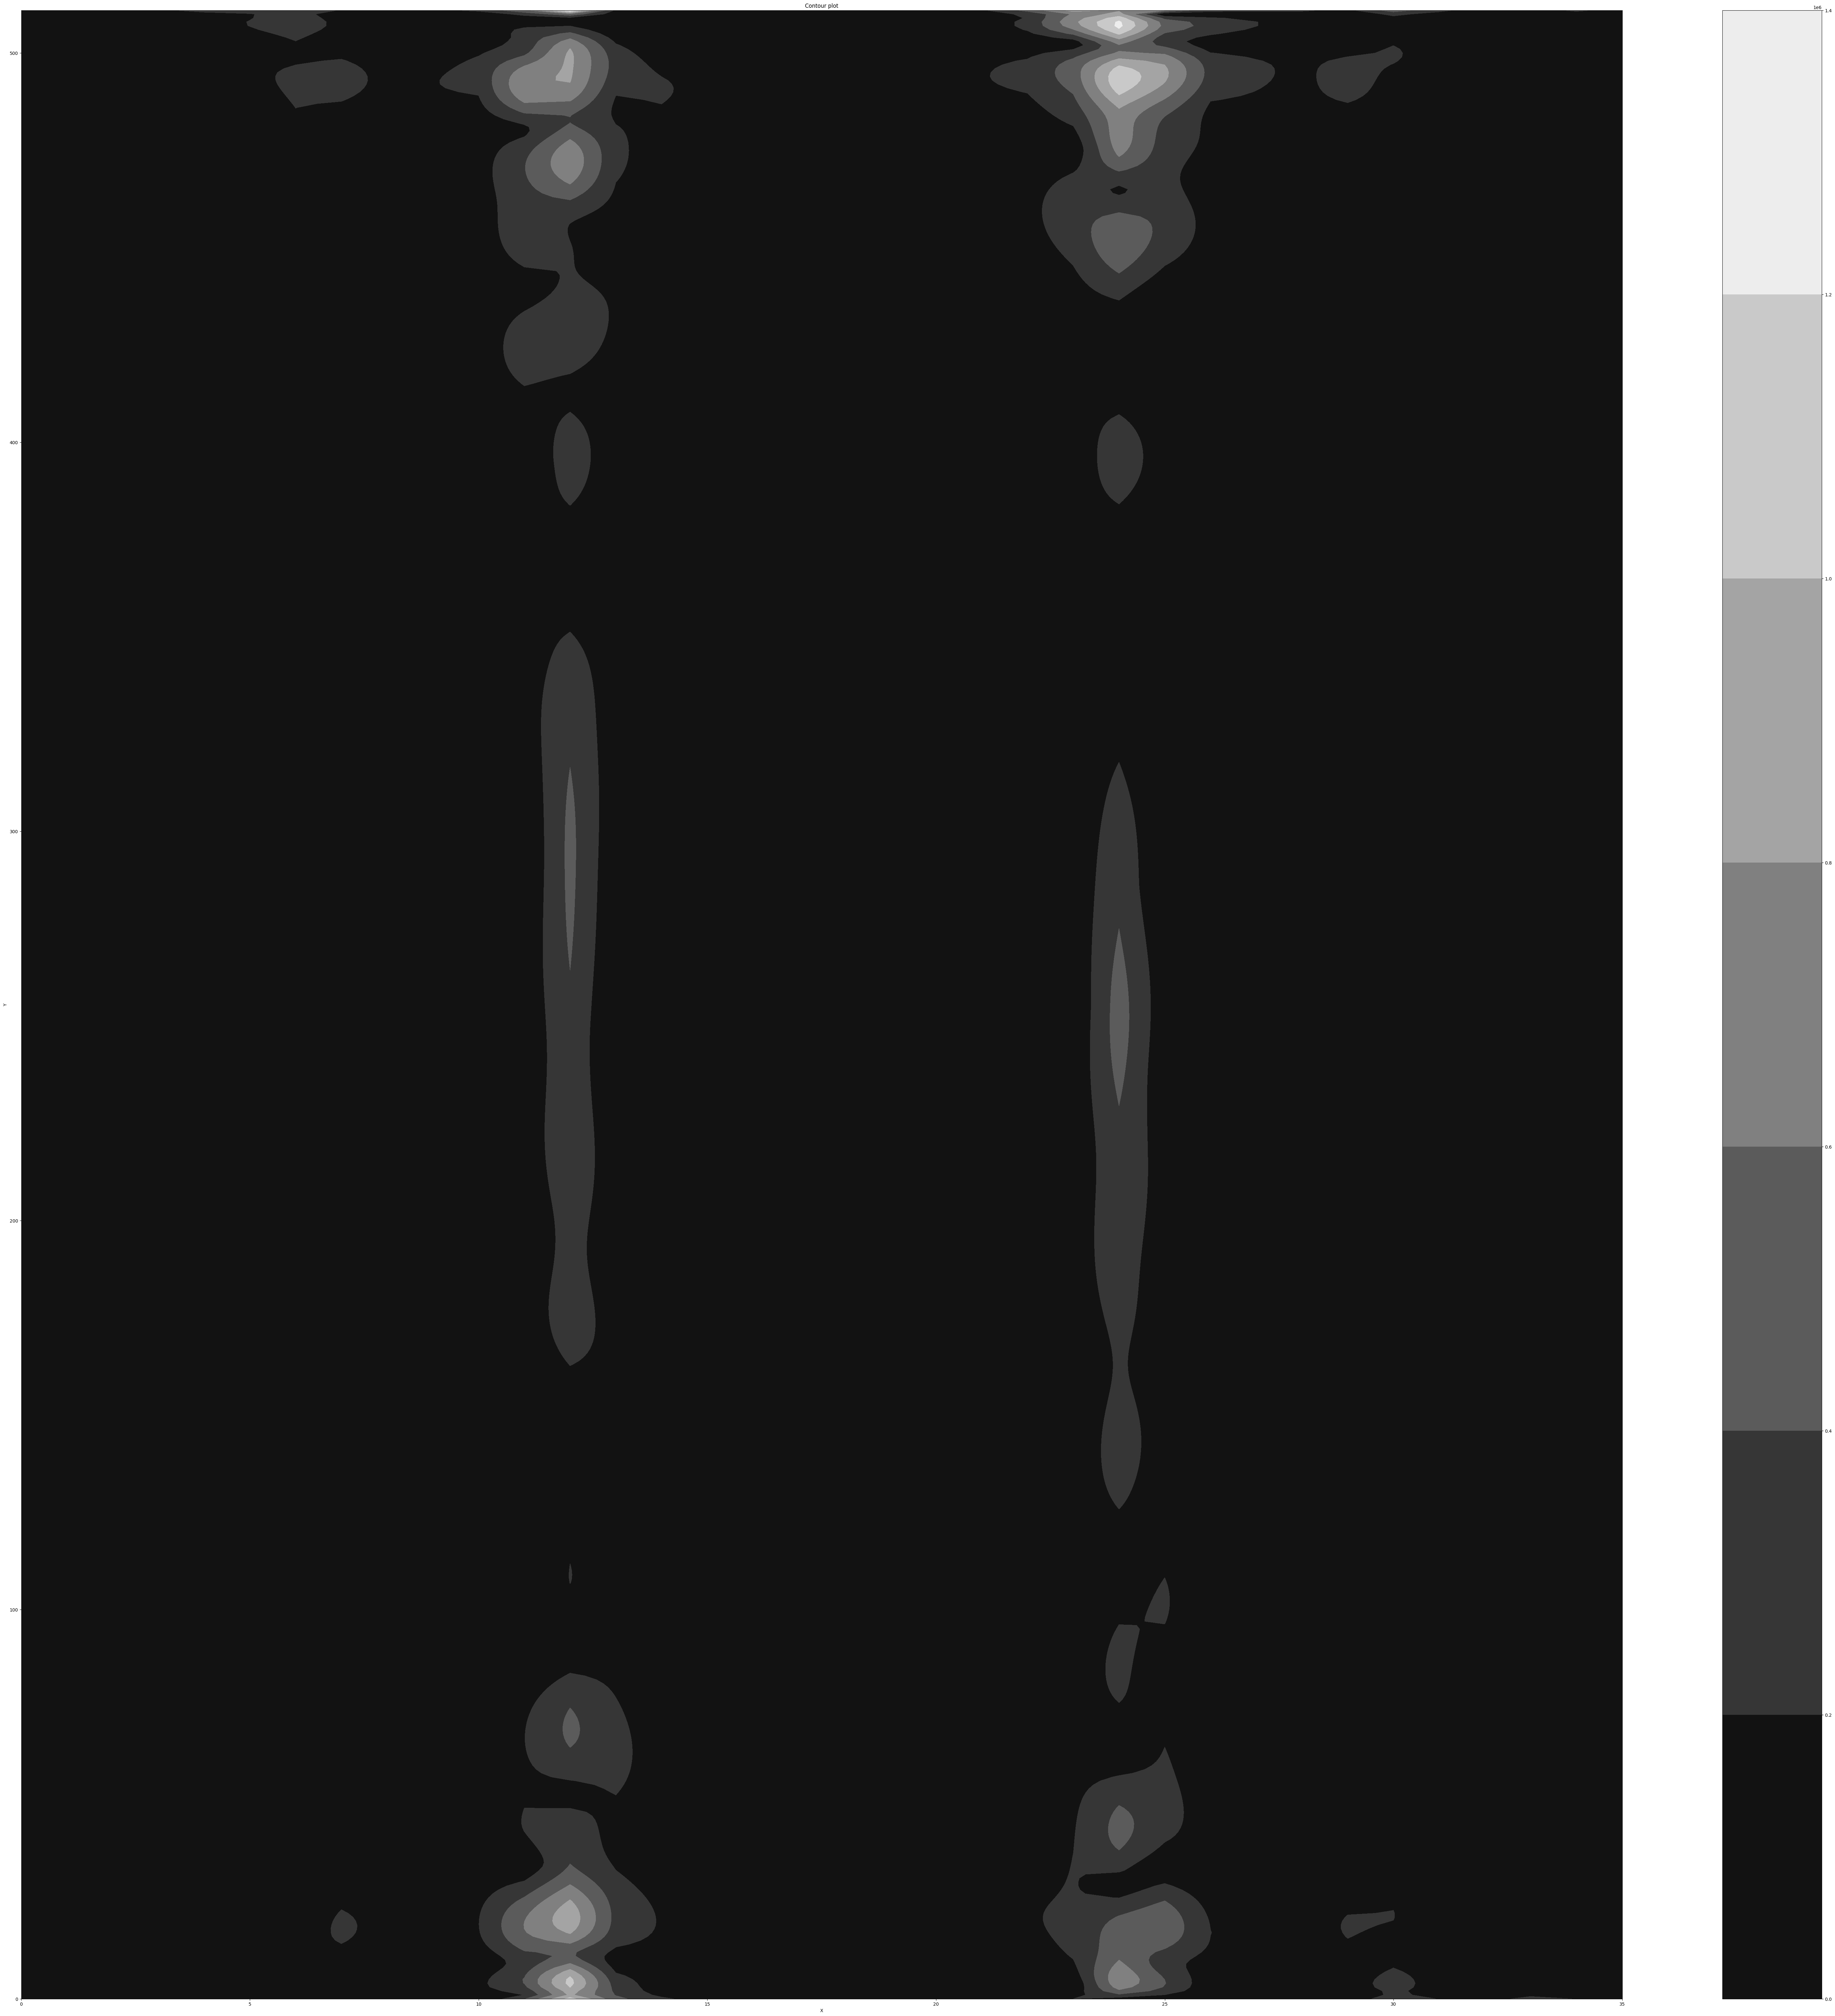

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fft_data_dim2_abs =  fft_data_dim2_abs

# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the contour plot
plt.figure(figsize=(80, 80))
plt.contourf(X, Y, fft_data_dim2_abs, cmap='gray') # Change colormap
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

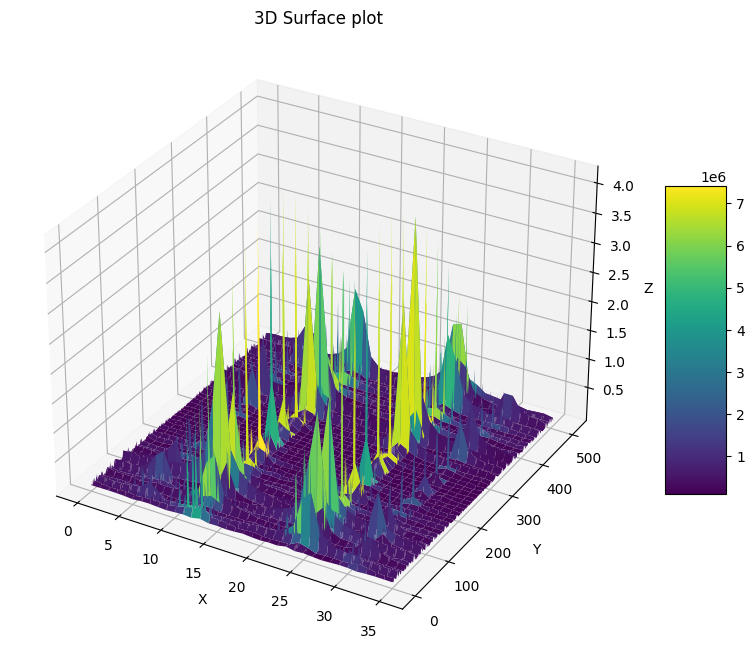

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# assuming fft_data_dim2_abs is the 2D data
# generate grid for the 3D plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, fft_data_dim2_abs, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
# install tools for pdf output

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
# output as PDF
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/MRS_2D.ipynb' --output-dir /content/

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MRS_2D.ipynb to pdf
[NbConvertApp] Support files will be in MRS_2D_files/
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Writing 73328 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1443102 bytes to /content/MRS_2D.pdf
